In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
zillow = pd.read_csv("data-zillow.csv")
zillow.head()

,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
0,5/31/2017,6181,New York,NY,New York,Queens,0,672400
1,5/31/2017,12447,Los Angeles,CA,Los Angeles-Long Beach-Anaheim,Los Angeles,1,629900
2,5/31/2017,17426,Chicago,IL,Chicago,Cook,2,222700
3,5/31/2017,13271,Philadelphia,PA,Philadelphia,Philadelphia,3,137300
4,5/31/2017,40326,Phoenix,AZ,Phoenix,Maricopa,4,211300


In [4]:
zillow['Date'] = pd.to_datetime(zillow['Date'])
zillow['Date'].dtypes

dtype('<M8[ns]')

### Filtering using the `isin()` method    
We can use the `isin()` method to filter our dataset by a list of values for a particular column or columns

To select only those records from the `Metro` column tha have values of either `New York` or `San Francisco`:
- call the `isin()` method on the `Metro` column
- pass it a list of the cities we want to select to create the Boolean series
- pass the Boolean series to our dataframe to make the necessary filtering and selection

In [7]:
city_filter = zillow['Metro'].isin(["New York", "San Francisco"])
city_filter.head()

0     True
1    False
2    False
3    False
4    False
Name: Metro, dtype: bool

In [8]:
zillow[city_filter].head()

,Date,RegionID,RegionName,State,Metro,County,SizeRank,Zhvi
0,2017-05-31,6181,New York,NY,New York,Queens,0,672400
10,2017-05-31,20330,San Francisco,CA,San Francisco,San Francisco,10,1194300
38,2017-05-31,13072,Oakland,CA,San Francisco,Alameda,38,680100
63,2017-05-31,12970,Newark,NJ,New York,Essex,63,232800
72,2017-05-31,25320,Jersey City,NJ,New York,Hudson,72,380000


We can use the keyword `axis` to change the behavior of a method.  We use `axis = 0` to specify rows and `axis = 1` to specify columns

In [11]:
zillow.axes

[RangeIndex(start=0, stop=10830, step=1),
 Index(['Date', 'RegionID', 'RegionName', 'State', 'Metro', 'County',
        'SizeRank', 'Zhvi'],
       dtype='object')]

In [13]:
values = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
values_df = pd.DataFrame(values)
values_df

,0,1,2
0,1,2,3
1,4,5,6
2,7,8,9


In [15]:
#let's calculate the eman for the values in a dataset.  If we pass `axis = 0`, then this means the mean
# calculated along the row axis

values_df.mean(axis = 0)

#so here is the part that takes some explaining.  It is not taking the mean of each row,
#instead it will make a new row with the mean for each column 
# i.e.  the mean will be calculated along the row axis

0    4.0
1    5.0
2    6.0
dtype: float64

In [16]:
values_df.mean(axis = 1)
#it makes a new column with the mean of each row
# i.e. the mean will be calculated along the column axis


0    2.0
1    5.0
2    8.0
dtype: float64

In [18]:
#you can also do the following:
values_df.mean(axis = 'rows')

0    4.0
1    5.0
2    6.0
dtype: float64

In [19]:
values_df.mean(axis = "columns")

0    2.0
1    5.0
2    8.0
dtype: float64

In [ ]:
## Find the mean along the row axis using the zillow dataframe

We can also use the `axis = ` parameter with the `.drop()` method to drop a row (observation) or a column(variable)

In [20]:
#tell pandas to drop the column at the index of 0 

values_df.drop(0, axis = 1)

#notice that I did not save this to a variable so it will display the change but not save it

,1,2
0,2,3
1,5,6
2,8,9


In [21]:
pet_info = [["Autumn", 4, "Dog"], ["Belle", 5, "Dog"],\
            ["Oliver", 4, "cat",], ["Khaleesi", 4, "cat"],\
            ["Chewie", 1, "dog"], ["Gamli", 16, "cat"],
            ["Duke", 1, "dog"], ["Captain Carter", 0, "dog"]]

pet_df = pd.DataFrame(pet_info, columns = ["Name", "Age", "Type"],
                     index = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H'])
pet_df

,Name,Age,Type
A,Autumn,4,Dog
B,Belle,5,Dog
C,Oliver,4,cat
D,Khaleesi,4,cat
E,Chewie,1,dog
F,Gamli,16,cat
G,Duke,1,dog
H,Captain Carter,0,dog


In [22]:
pet_df.drop("H", axis = 0)

,Name,Age,Type
A,Autumn,4,Dog
B,Belle,5,Dog
C,Oliver,4,cat
D,Khaleesi,4,cat
E,Chewie,1,dog
F,Gamli,16,cat
G,Duke,1,dog


In [23]:
pet_df.drop("Name", axis = 1)

,Age,Type
A,4,Dog
B,5,Dog
C,4,cat
D,4,cat
E,1,dog
F,16,cat
G,1,dog
H,0,dog


In [25]:
# We can also use pandas .filter() method to filter data

filtering = zillow.filter(items = ["State", "Metro"])
filtering.head()

,State,Metro
0,NY,New York
1,CA,Los Angeles-Long Beach-Anaheim
2,IL,Chicago
3,PA,Philadelphia
4,AZ,Phoenix


In [26]:
#we can also use filter with regular expressions to find patterns in string data'
# we do this by passing our regular expression to the `regex` parameter
# we use the axis parameter to set it column

filtered_data = zillow.filter(regex = "Region", axis = 1)
filtered_data.head()

,RegionID,RegionName
0,6181,New York
1,12447,Los Angeles
2,17426,Chicago
3,13271,Philadelphia
4,40326,Phoenix


Using string methods in Pandas

In [27]:
#we can check for a substring in a panda series by using the .contains() method from the str package

#we can use the .contains() methods on the RegionName from the Zillow dataset.  
#Let's look for records that have the "New" substring

zillow.RegionName.str.contains("New").head()



0     True
1    False
2    False
3    False
4    False
Name: RegionName, dtype: bool

In [29]:
zillow['RegionName'].str.contains("New").head()

0     True
1    False
2    False
3    False
4    False
Name: RegionName, dtype: bool

In [30]:
#we can change the case of a series/column by using str.upper()

zillow.RegionName.str.upper().head()

0        NEW YORK
1     LOS ANGELES
2         CHICAGO
3    PHILADELPHIA
4         PHOENIX
Name: RegionName, dtype: object

In [31]:
#we can change the case of a series/column by using str.lower()

zillow.RegionName.str.lower().head()

0        new york
1     los angeles
2         chicago
3    philadelphia
4         phoenix
Name: RegionName, dtype: object

In [32]:
#we can find the length of every value in a column by using the str.len() method
#we can change the case of a series/column by using str.upper()

zillow.RegionName.str.len().head()

0     8
1    11
2     7
3    12
4     7
Name: RegionName, dtype: int64

In [33]:
#we can remove white speces
#we can use .lstrip() method to remove all leading white space in a column
#we can change the case of a series/column by using str.upper()

zillow.RegionName.head()

0        New York
1     Los Angeles
2         Chicago
3    Philadelphia
4         Phoenix
Name: RegionName, dtype: object

In [34]:
#we can change the case of a series/column by using str.upper()

zillow.RegionName.str.lstrip().head()

0        New York
1     Los Angeles
2         Chicago
3    Philadelphia
4         Phoenix
Name: RegionName, dtype: object

In [35]:
#we can change our data using string methods too
#let's replace the spaces in the RegionName column with no space
#using the .replace() method

#we can change the case of a series/column by using str.upper()

zillow.RegionName.str.replace(' ', '').head()

0         NewYork
1      LosAngeles
2         Chicago
3    Philadelphia
4         Phoenix
Name: RegionName, dtype: object

Sometimes, we have to change the data type of an object.  We saw this before when I made Time into a date/time object


In [36]:
#first, let's check what kind of data we have in our dataset by using .dtypes
zillow.dtypes

Date          datetime64[ns]
RegionID               int64
RegionName            object
State                 object
Metro                 object
County                object
SizeRank               int64
Zhvi                   int64
dtype: object

In [37]:
#suppose we want to change the the "Zhvi" from an int to a float
#we can use the .astype() method to change the datatype

#we call this method on the column, and then pass float to the .astype() method

zillow['Zhvi'] = zillow.Zhvi.astype(float)
zillow.dtypes
#FYI, you can also change datatypes of a column when you read in the data. You can google that

Date          datetime64[ns]
RegionID               int64
RegionName            object
State                 object
Metro                 object
County                object
SizeRank               int64
Zhvi                 float64
dtype: object

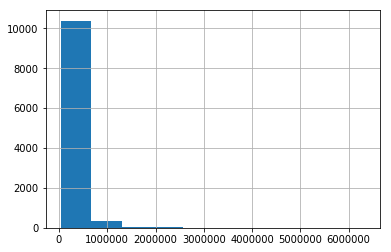

In [38]:
#Since we are here, let's see what the distribution of home prices look like (that is the Zhvi column)

zillow['Zhvi'].hist()

In [39]:
#we seem to have a wide range of values...let's use .describe to get a better idea

zillow['Zhvi'].describe()

count    1.083000e+04
mean     2.503076e+05
std      2.565582e+05
min      3.740000e+04
25%      1.269000e+05
50%      1.818000e+05
75%      2.823500e+05
max      6.343800e+06
Name: Zhvi, dtype: float64

In [40]:
zillow['Zhvi'].describe().apply(lambda x: format(x, 'f'))

count      10830.000000
mean      250307.590028
std       256558.223083
min        37400.000000
25%       126900.000000
50%       181800.000000
75%       282350.000000
max      6343800.000000
Name: Zhvi, dtype: object

In [41]:
print("max = ", zillow['Zhvi'].max()," ; min = ", zillow['Zhvi'].min())
print("the range is ", zillow['Zhvi'].max() - zillow['Zhvi'].min())

max =  6343800.0  ; min =  37400.0
the range is  6306400.0


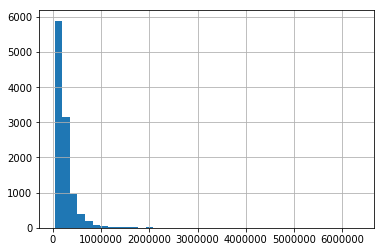

In [44]:
zillow['Zhvi'].hist(bins = 40)

Text(0,0.5,'# of homes')

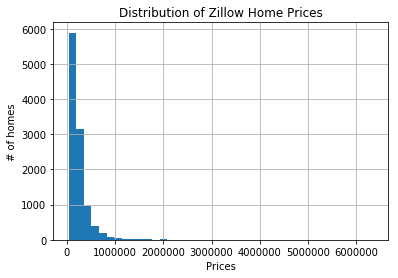

In [45]:
#of course, a plot is not a plot without a title and labeled axes
zillow['Zhvi'].hist(bins = 40)
plt.title("Distribution of Zillow Home Prices")
plt.xlabel("Prices")
plt.ylabel("# of homes")

#also use these labels on your bar graphs (or any graph done in pandas and matplotlib)

In [46]:
zillow.Date.value_counts()

2017-05-31    10830
Name: Date, dtype: int64

In [47]:
#FYI, we can do describe on the entire dataset
# for the numerical columns use .describe()

zillow.describe()

,RegionID,SizeRank,Zhvi
count,10830.000000,10830.000000,1.083000e+04
mean,84344.818837,5414.500000,2.503076e+05
std,125679.686534,3126.496042,2.565582e+05
min,3301.000000,0.000000,3.740000e+04
25%,19346.250000,2707.250000,1.269000e+05
50%,35444.500000,5414.500000,1.818000e+05
75%,52608.250000,8121.750000,2.823500e+05
max,737791.000000,10829.000000,6.343800e+06


In [49]:
#for non-numerical columns 
zillow.describe(include = ["O"])

,RegionName,State,Metro,County
count,10830,10830,10256,10830
unique,8260,49,566,930
top,Springfield,PA,New York,Washington
freq,16,1208,648,189
